In [2]:
from google.colab import files
uploaded = files.upload()

Saving Resume_dataSet.csv to Resume_dataSet.csv


In [3]:
!pip install nltk tensorflow panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=ce53c22a37567a9658637523bbd83d65768d6cfa9157a3c08a10b4523652df67
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [4]:
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [5]:
import pandas as pd
data = pd.read_csv('Resume_dataSet.csv')
data

,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
...,...,...,...,...,...,...
593,Master's in Statistics,3,"SAS, SAS Viya",SAS Institute,1,0
594,Master's in Statistics,3,"SAS, SQL",Google Inc.,1,0
595,Master's in Statistics,3,"SAS, SAS Viya",Oracle Corporation,1,0
596,PhD in Robotics,6,"C++,ROS,Gazebo,Computer Vision","Stanford University,Bosch",1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree        598 non-null    object
 1   Experience    598 non-null    int64 
 2   Technology    598 non-null    object
 3   Organization  598 non-null    object
 4   Eligible      598 non-null    int64 
 5   Not Eligible  598 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.duplicated().sum()

157

In [8]:
df = pd.read_csv("Resume_dataSet.csv", encoding='cp1252')
df


,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
...,...,...,...,...,...,...
593,Master's in Statistics,3,"SAS, SAS Viya",SAS Institute,1,0
594,Master's in Statistics,3,"SAS, SQL",Google Inc.,1,0
595,Master's in Statistics,3,"SAS, SAS Viya",Oracle Corporation,1,0
596,PhD in Robotics,6,"C++,ROS,Gazebo,Computer Vision","Stanford University,Bosch",1,0


In [9]:
print(df.shape)

df.head()

(598, 6)


,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0


In [10]:
print('Total Technology this period:', len(data.index), '\n')

Total Technology this period: 598 



In [11]:
df.iloc[100]

print(df.info())  # summary of data types and counts

print(df.describe())  # summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree        598 non-null    object
 1   Experience    598 non-null    int64 
 2   Technology    598 non-null    object
 3   Organization  598 non-null    object
 4   Eligible      598 non-null    int64 
 5   Not Eligible  598 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 28.2+ KB
None
       Experience    Eligible  Not Eligible
count  598.000000  598.000000    598.000000
mean     2.249164    0.740803      0.259197
std      1.935248    0.438561      0.438561
min      0.000000    0.000000      0.000000
25%      0.000000    0.000000      0.000000
50%      2.000000    1.000000      0.000000
75%      3.000000    1.000000      1.000000
max      7.000000    1.000000      1.000000


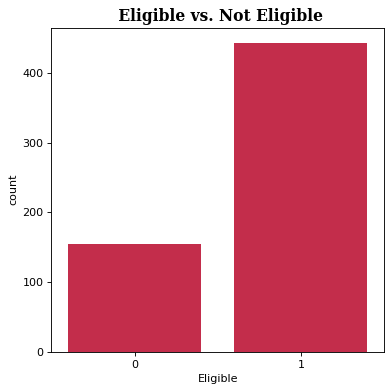

In [12]:
# Import necessary libraries
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 80

# Read the CSV file into a DataFrame
df = pd.read_csv("Resume_dataSet.csv", encoding='cp1252')

# ... (rest of your plotting code) ...

font = FontProperties()
font.set_family('serif')
# ... (rest of your font settings) ...

plt.figure(figsize=(5, 5))

plt.title(' Eligible vs. Not Eligible',fontproperties=font,fontweight ="bold",fontsize=14)
# ... (rest of your plotting code) ...

sns.countplot(x='Eligible', data=df,color = 'crimson')  # visualize eligible vs. not eligible
plt.tight_layout()
plt.show()

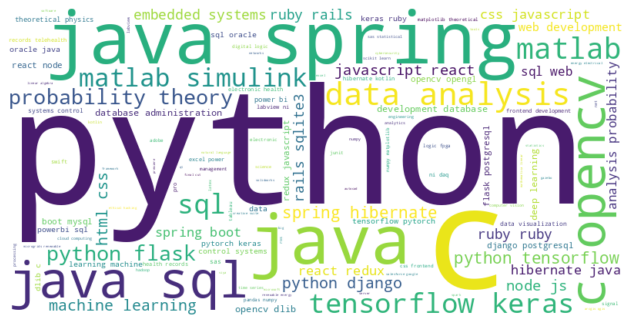

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['Technology'] = df['Technology'].apply(preprocess_text)

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed text into a single string
text = ' '.join(df['Technology'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


(598, 50)


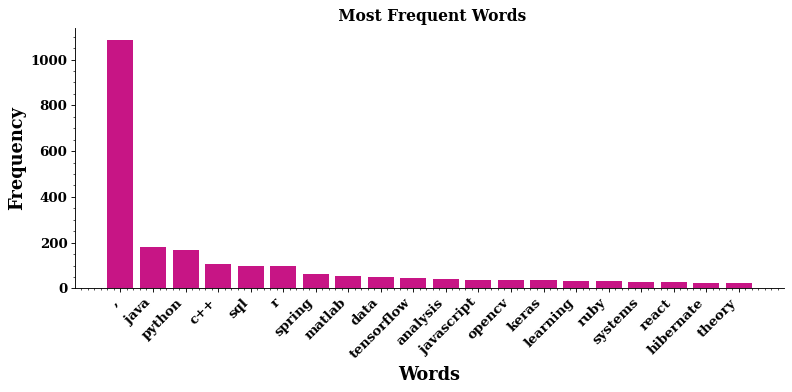

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Technology'])

sequences = tokenizer.texts_to_sequences(df['Technology'])
padded_sequences = pad_sequences(sequences, maxlen=50)

print(padded_sequences.shape)

# @title WORD FREQUENCY
from collections import Counter
import matplotlib.pyplot as plt

# Combine all preprocessed text into a single string
text = ' '.join(df['Technology'])

# Count word frequencies
word_counts = Counter(text.split())

# Get the 20 most common words and their counts
top_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_words)

# Create a bar chart


plt.figure(figsize=(10, 5))
plt.bar(words, counts,color = 'mediumvioletred')
plt.title(' Most Frequent Words',fontproperties=font,fontweight ="bold",fontsize=14)
plt.ylabel('Frequency',fontproperties=font,fontweight ="bold",fontsize=16)
plt.xlabel('Words',fontproperties=font,fontweight ="bold",fontsize=16)
sns.despine()
plt.minorticks_on()
plt.xticks(fontproperties=font,fontweight ="bold",fontsize=12)
plt.yticks(fontproperties=font,fontweight ="bold",fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



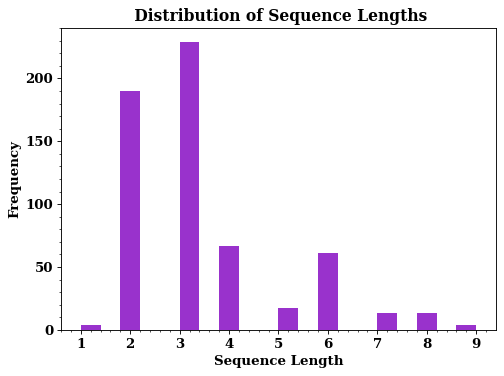

Sequence 1: [2, 5, 39, 14, 27, 14]
Sequence 2: [2, 5, 39, 14, 27, 14]
Sequence 3: [2, 5, 8, 10, 21, 19]
Sequence 4: [2, 5, 8, 10, 21, 19]
Sequence 5: [2, 5, 8, 10, 21, 19]


In [16]:
# @title Sequence Length Distribution
import matplotlib.pyplot as plt

# Calculate sequence lengths
sequence_lengths = [len(seq) for seq in sequences]

# Create a histogram
plt.hist(sequence_lengths, bins=20,color = 'darkorchid')
plt.title(' Distribution of Sequence Lengths',fontproperties=font,fontweight ="bold",fontsize=14)
plt.ylabel('Frequency',fontproperties=font,fontweight ="bold",fontsize=12)
plt.xlabel('Sequence Length',fontproperties=font,fontweight ="bold",fontsize=12)
plt.minorticks_on()
plt.xticks(fontproperties=font,fontweight ="bold",fontsize=12)
plt.yticks(fontproperties=font,fontweight ="bold",fontsize=12)


plt.tight_layout()

plt.show()

# @title Toxenized Sequence (Text converted into numerical)
# Print the first 5 tokenized sequences
for i in range(5):
    print(f"Sequence {i+1}: {sequences[i]}")

In [17]:
data['Technology'][0]

'Python,R,Deep Learning,Machine Learning'

In [18]:
'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [19]:
data['Technology'].value_counts()

Technology
Java, Spring                                                        22
R, Python                                                           21
MATLAB, Simulink                                                    18
Java, Spring, Hibernate                                             18
Java, C++, SQL                                                      18
                                                                    ..
Java, Python, SQL                                                    1
c++                                                                  1
C++,c,Python                                                         1
Java,SQL,Web Development,Database Administration,Cloud Computing     1
C++,Matlab,Power Electronics,Embedded Systems                        1
Name: count, Length: 164, dtype: int64

<Axes: xlabel='count', ylabel='Technology'>

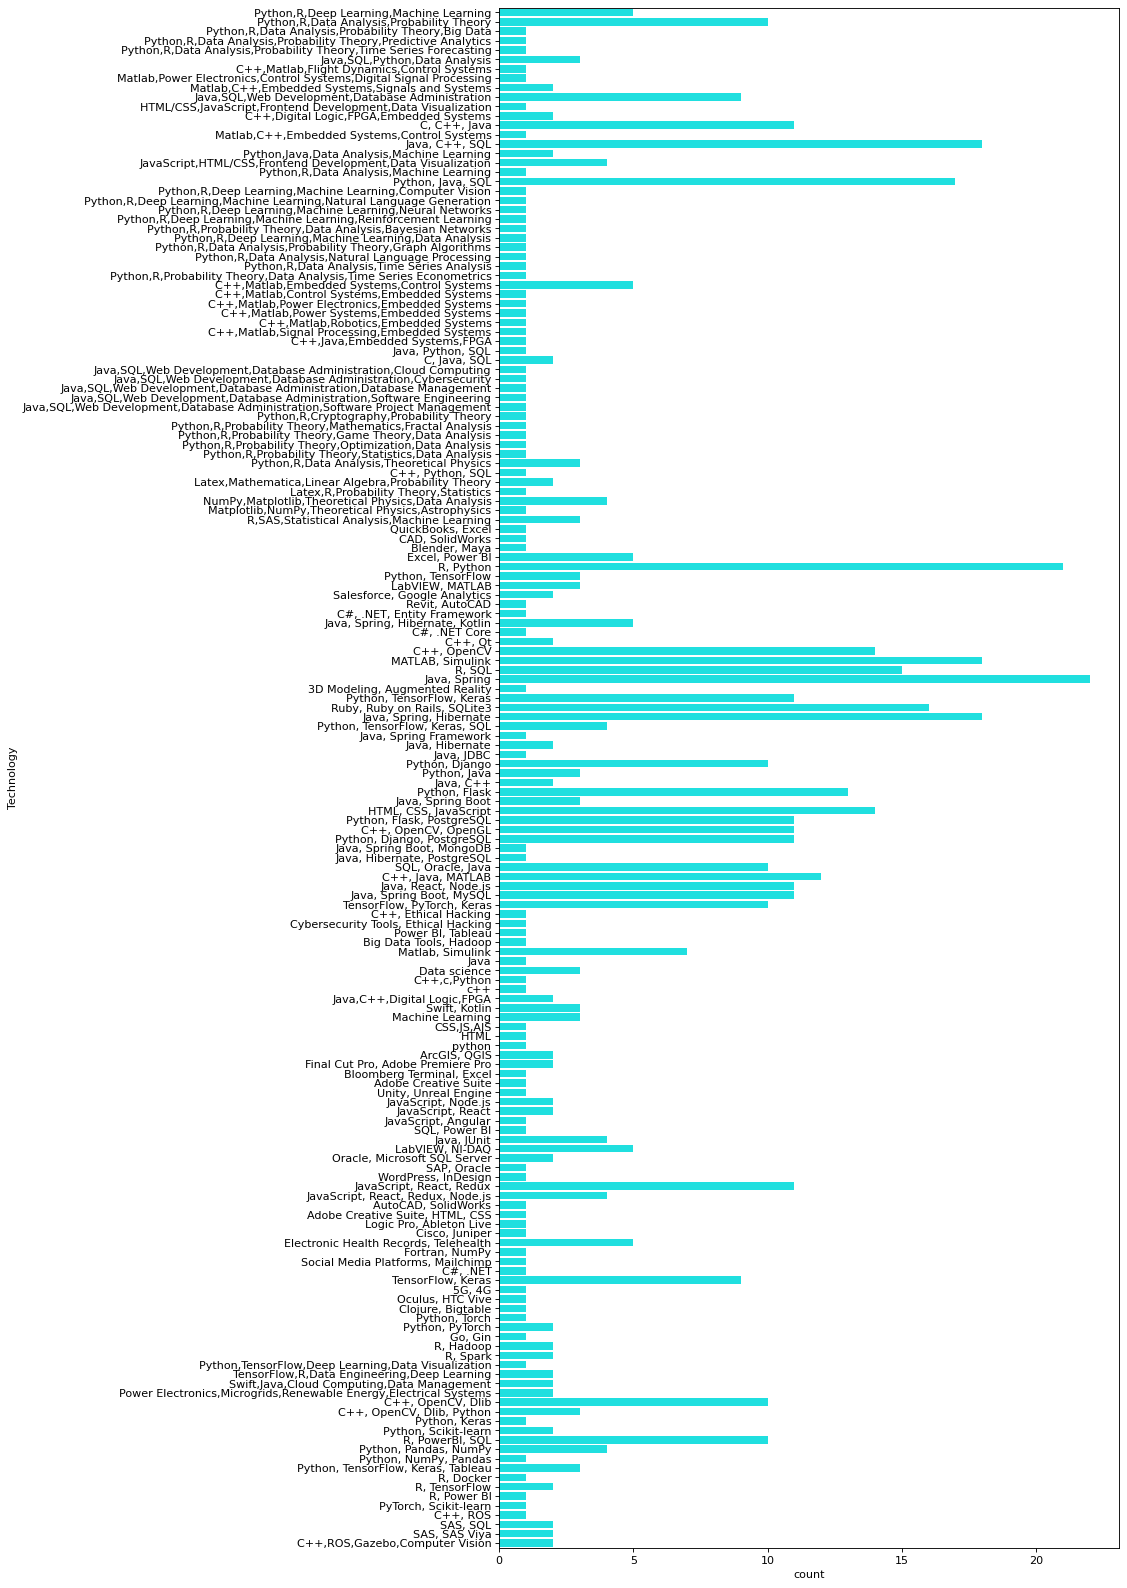

In [20]:
plt.figure(figsize=(10, 25))
sns.countplot(y='Technology', data=data,color ='aqua')

In [21]:
#pre-processing of data to remove special characters, hashtags, urls etc
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

data['cleaned_resume'] = data.Technology.apply(lambda x: cleanResume(x))
data

,Degree,Experience,Technology,Organization,Eligible,Not Eligible,cleaned_resume
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0,Python R Deep Learning Machine Learning
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0,Python R Deep Learning Machine Learning
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0,Python R Data Analysis Probability Theory
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0,Python R Data Analysis Probability Theory
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0,Python R Data Analysis Probability Theory
...,...,...,...,...,...,...,...
593,Master's in Statistics,3,"SAS, SAS Viya",SAS Institute,1,0,SAS SAS Viya
594,Master's in Statistics,3,"SAS, SQL",Google Inc.,1,0,SAS SQL
595,Master's in Statistics,3,"SAS, SAS Viya",Oracle Corporation,1,0,SAS SAS Viya
596,PhD in Robotics,6,"C++,ROS,Gazebo,Computer Vision","Stanford University,Bosch",1,0,C ROS Gazebo Computer Vision


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

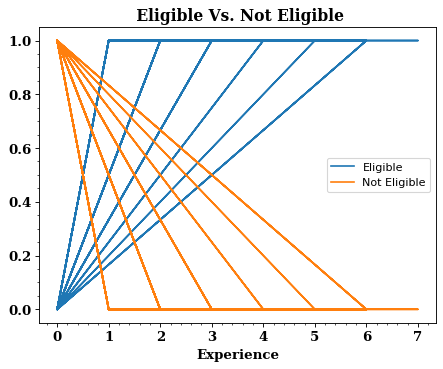

In [22]:
data.plot(x='Experience', y=['Eligible', 'Not Eligible'])
plt.title(' Eligible Vs. Not Eligible',fontproperties=font,fontweight ="bold",fontsize=14)
#plt.ylabel('Frequency',fontproperties=font,fontweight ="bold",fontsize=12)
plt.xlabel('Experience',fontproperties=font,fontweight ="bold",fontsize=12)
plt.minorticks_on()
plt.xticks(fontproperties=font,fontweight ="bold",fontsize=12)
plt.yticks(fontproperties=font,fontweight ="bold",fontsize=12)

In [23]:
print('--- Original CV ---')
print(data['Technology'][0])

--- Original CV ---
Python,R,Deep Learning,Machine Learning


In [24]:
# Printing the same resume after text cleaning
print('--- Cleaned resume ---')
print(data['cleaned_resume'][0])

--- Cleaned resume ---
Python R Deep Learning Machine Learning


In [25]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['cleaned_resume'].values
cleanedSentences = ""
for i in range(len(data)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Java', 181), ('Python', 167), ('C', 124), ('SQL', 100), ('R', 97), ('Spring', 61), ('Data', 50), ('TensorFlow', 45), ('Analysis', 40), ('JavaScript', 39), ('OpenCV', 38), ('Keras', 38), ('Learning', 33), ('MATLAB', 33), ('Ruby', 32), ('Systems', 30), ('React', 28), ('Hibernate', 26), ('Theory', 25), ('Simulink', 25), ('Probability', 24), ('Flask', 24), ('PostgreSQL', 23), ('Matlab', 22), ('HTML', 21), ('CSS', 21), ('Django', 21), ('Machine', 19), ('Development', 19), ('Node', 17), ('js', 17), ('Embedded', 16), ('Rails', 16), ('SQLite3', 16), ('Database', 15), ('Boot', 15), ('Redux', 15), ('Web', 14), ('Administration', 14), ('Deep', 13), ('Power', 13), ('Oracle', 13), ('PyTorch', 13), ('Dlib', 13), ('NumPy', 11), ('OpenGL', 11), ('MySQL', 11), ('PowerBI', 10), ('Control', 9), ('SAS', 9)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


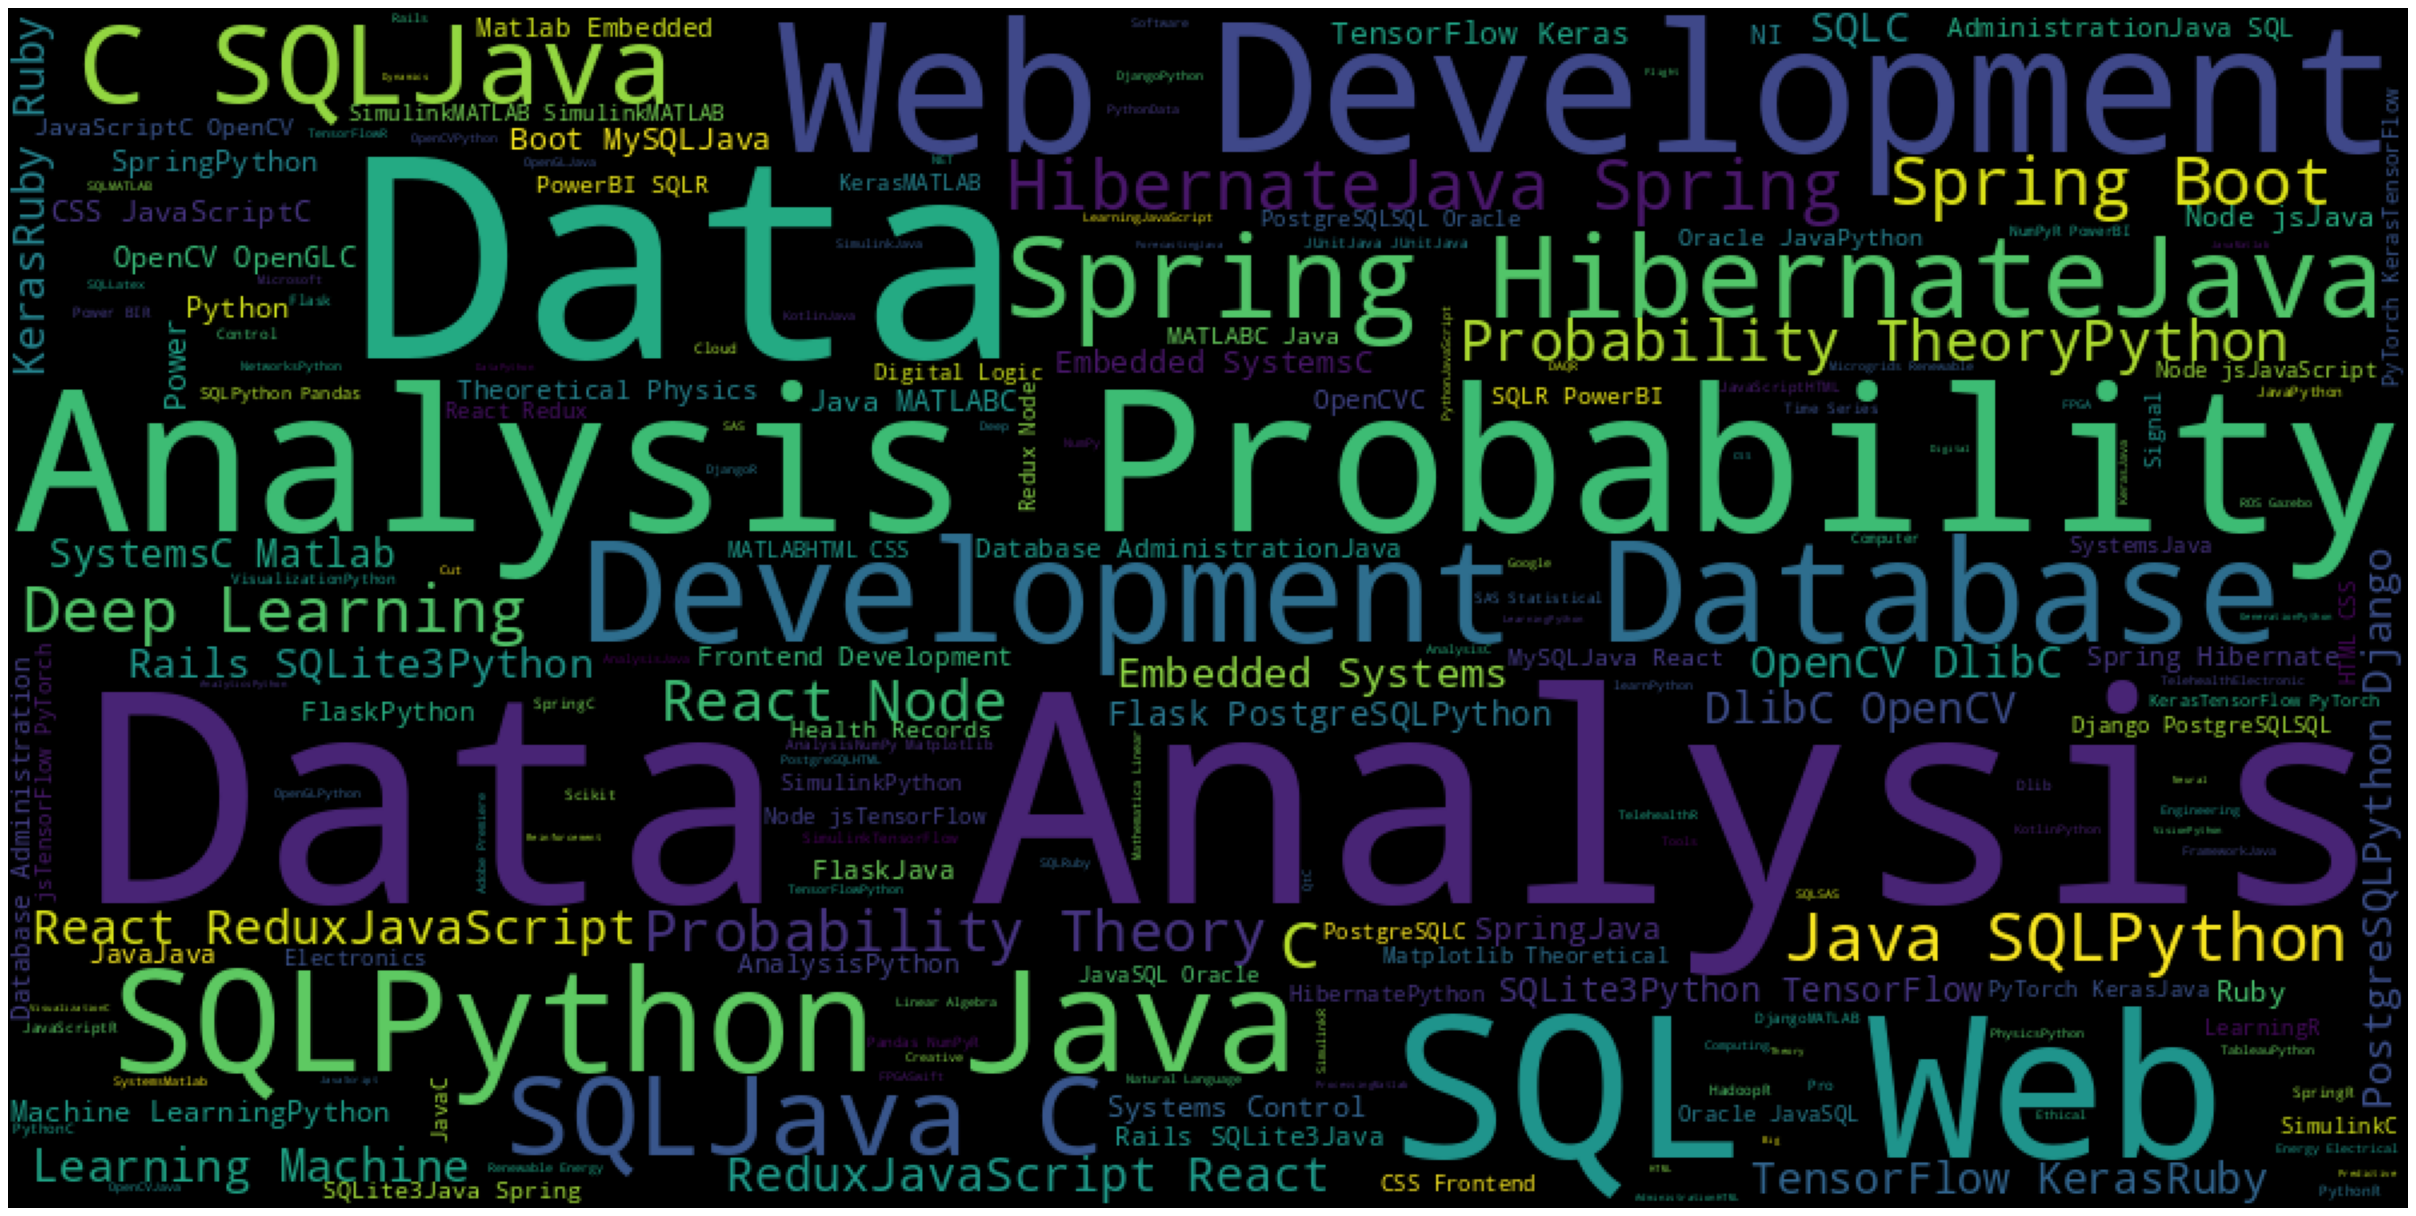

In [26]:
wordcloud = WordCloud( background_color='black',
                          width=1000,
                          height=500,
                    ).generate(cleanedSentences)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

In [29]:
from sklearn.utils import shuffle

# Get features and labels from data and shuffle
features = data['cleaned_resume'].values
original_labels = data['Technology'].values
labels = original_labels[:]

for i in range(len(data)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

Ruby Ruby on Rails SQLite3
ruby,rubyonrails,sqlite3


In [38]:
# Split into train and test
train_split = 0.8
train_size = int(train_split * len(data))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

478
120


In [31]:
# Tokenize feature data
vocab_size = 600
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'java': 2, 'python': 3, 'c': 4, 'sql': 5, 'r': 6, 'spring': 7, 'matlab': 8, 'data': 9, 'tensorflow': 10, 'analysis': 11, 'javascript': 12, 'opencv': 13, 'keras': 14, 'learning': 15, 'ruby': 16, 'systems': 17, 'react': 18, 'hibernate': 19, 'theory': 20, 'simulink': 21, 'flask': 22, 'probability': 23, 'postgresql': 24, 'html': 25, 'css': 26, 'django': 27, 'machine': 28, 'development': 29, 'js': 30, 'node': 31, 'on': 32, 'rails': 33, 'sqlite3': 34, 'embedded': 35, 'boot': 36, 'redux': 37, 'database': 38, 'web': 39, 'administration': 40, 'deep': 41, 'power': 42, 'oracle': 43, 'pytorch': 44, 'dlib': 45, 'mysql': 46, 'numpy': 47, 'opengl': 48, 'powerbi': 49, 'sas': 50, 'control': 51, 'labview': 52, 'kotlin': 53, 'theoretical': 54, 'physics': 55, 'bi': 56, 'excel': 57, 'visualization': 58, 'ni': 59, 'daq': 60, 'electronic': 61, 'health': 62, 'records': 63, 'telehealth': 64, 'swift': 65, 'pandas': 66, 'matplotlib': 67, 'frontend': 68, 'digital': 69, 'logic': 70, 'fpga': 71, 'pro': 72

In [32]:
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'java': 1, 'python': 2, 'c': 3, 'sql': 4, 'r': 5, 'matlab': 6, 'tensorflow': 7, 'spring': 8, 'javascript': 9, 'opencv': 10, 'keras': 11, 'dataanalysis': 12, 'react': 13, 'hibernate': 14, 'simulink': 15, 'flask': 16, 'probabilitytheory': 17, 'postgresql': 18, 'html': 19, 'css': 20, 'django': 21, 'machinelearning': 22, 'js': 23, 'powerbi': 24, 'node': 25, 'ruby': 26, 'rubyonrails': 27, 'sqlite3': 28, 'embeddedsystems': 29, 'springboot': 30, 'redux': 31, 'webdevelopment': 32, 'databaseadministration': 33, 'deeplearning': 34, 'oracle': 35, 'pytorch': 36, 'dlib': 37, 'mysql': 38, 'numpy': 39, 'opengl': 40, 'controlsystems': 41, 'labview': 42, 'kotlin': 43, 'theoreticalphysics': 44, 'excel': 45, 'sas': 46, 'datavisualization': 47, 'ni': 48, 'daq': 49, 'electronichealthrecords': 50, 'telehealth': 51, 'swift': 52, 'pandas': 53, 'matplotlib': 54, 'frontenddevelopment': 55, 'fpga': 56, 'powerelectronics': 57, 'digitallogic': 58, 'tableau': 59, 'junit': 60, 'latex': 61, 'hadoop': 62, 'computervi

In [33]:
# Pad sequences for feature data
max_length = 30
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[16 16 32 33 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
[61 62 63 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


In [42]:
# @title MODEL
embedding_dim = 64
num_classes = 10  # Replace 10 with the actual number of classes in your dataset

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(num_classes, activation='softmax') # Now num_classes is defined
])

model.summary()  # Call the summary method to display the model architecture

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1, 64)             38400     
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 105738 (413.04 KB)
Trainable params: 105738 (413.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# @title MODEL
embedding_dim = 64
num_classes = 10  # Replace 10 with the actual number of classes in your dataset

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(num_classes, activation='softmax') # Now num_classes is defined
])

model.summary()  # Call the summary method to display the model architecture

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1, 64)             38400     
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 105738 (413.04 KB)
Trainable params: 105738 (413.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Convert labels to integers and ensure they are within the valid range
num_classes = 10
train_labels = np.clip(np.asarray(train_labels).astype(np.int32), 0, num_classes - 1)
test_labels = np.clip(np.asarray(test_labels).astype(np.int32), 0, num_classes - 1)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_feature_padded, train_labels,
                    epochs=5,
                    validation_data=(test_feature_padded, test_labels),
                    verbose=2)

ValueError: invalid literal for int() with base 10: 'ruby,rubyonrails,sqlite3'

In [53]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Ensure both train_labels and test_labels are strings before combining
train_labels = np.asarray(train_labels).astype(str)  # Convert to strings if they aren't already
test_labels = np.asarray(test_labels).astype(str)  # Convert to strings if they aren't already

# Fit the LabelEncoder to ALL labels (training and testing)
all_labels = np.concatenate((train_labels, test_labels))
le.fit(all_labels)  # Fit on the combined labels

# Transform the labels
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_feature_padded, train_labels,
                    epochs=5,
                    validation_data=(test_feature_padded, test_labels),
                    verbose=2)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-54-d60dc31efd2f>", line 5, in <cell line: 5>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1856, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 207 which is outside the valid range of [0, 163).  Label values: 156 197 165 152 167 190 204 177 185 161 144 182 176 199 155 187 197 207 194 150 184 148 165 171 183 185 194 201 183 165 193 199
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_23754]

In [1]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_feature_padded, test_labels, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test data
predictions = model.predict(test_feature_padded)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Generate a classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_classes))

# Generate a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

NameError: name 'model' is not defined

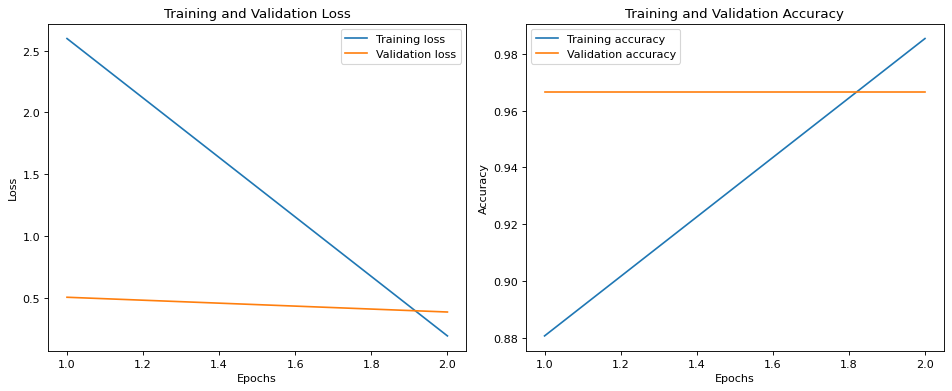

In [124]:
import matplotlib.pyplot as plt

# Extract loss and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Generate epochs range
epochs = range(1, len(loss) + 1)

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
ax1.plot(epochs, loss, label='Training loss')
ax1.plot(epochs, val_loss, label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(epochs, accuracy, label='Training accuracy')
ax2.plot(epochs, val_accuracy, label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()